## Questions:
    1. who often drives fast..male or female?
    2. which age group have more speeding violation than others?
    3. People of particular races having most search_conducted
    4. violation according to stop time day or night?
    5. which violation happens most at night
    6. which gender is having search_type as frisked?
    7. drug related stop

In [59]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from missingno import geoplot

In [60]:
#reading csv file
ri = pd.read_csv("../ri.csv")
ri.head()

stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_related_stop  
0         NaN       Citation       False      0-15 Min               False  
1         NaN       Citation       False      0-15 Min               False  
2         NaN       Citation       False      0-15 Min               False  
3         NaN  Arrest Driver        True     16-30 Min               False  
4         NaN       Citation       False      0-15 Min               False

### Total number of instances

In [61]:
#total number of instances
ri.shape[0]

91741

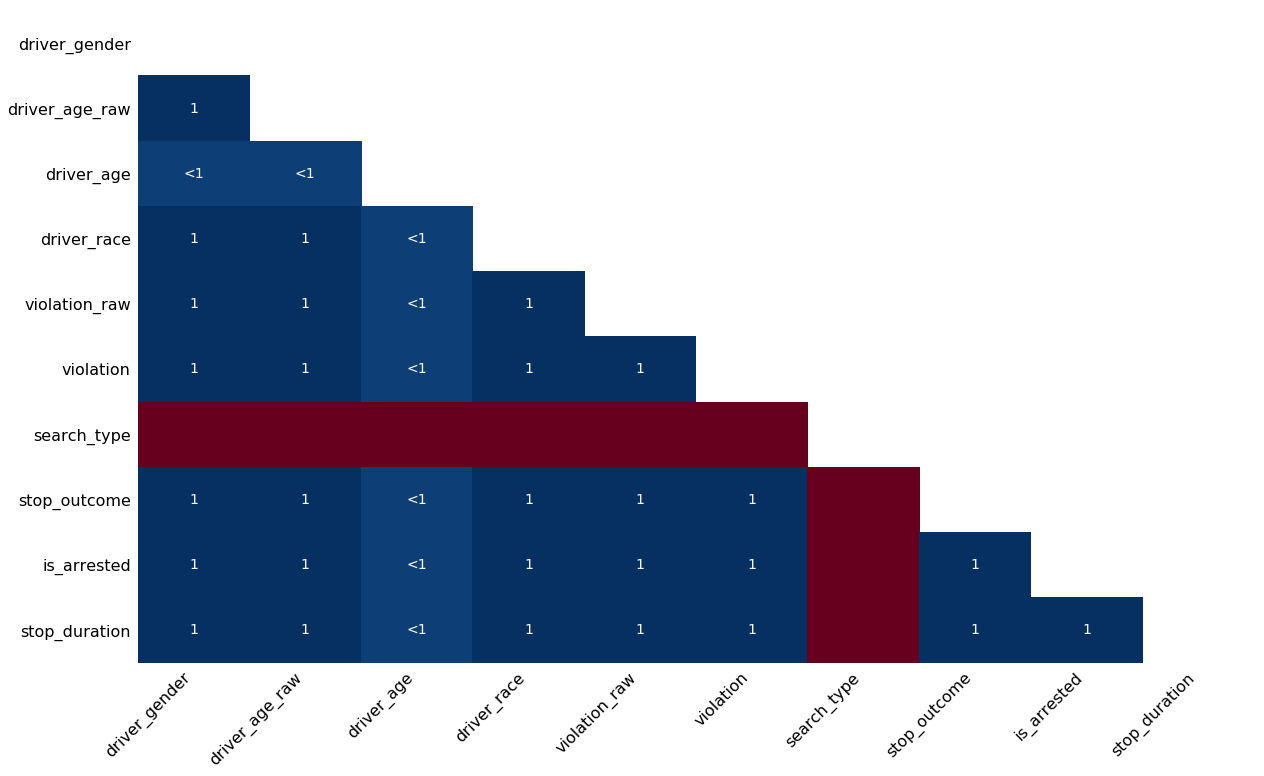

In [62]:
import missingno as msno
msno.heatmap(ri)

### Total number of null values from each column

In [63]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

###  Removing column 
From above output, we can see that all rows have the null values for 'county_name' column. That's why we will remove that column.


In [64]:
ri = ri.drop(['county_name'],axis=1)
ri

stop_date stop_time driver_gender  driver_age_raw  driver_age  \
0      2005-01-02     01:55             M          1985.0        20.0   
1      2005-01-18     08:15             M          1965.0        40.0   
2      2005-01-23     23:15             M          1972.0        33.0   
3      2005-02-20     17:15             M          1986.0        19.0   
4      2005-03-14     10:00             F          1984.0        21.0   
5      2005-03-23     09:45             M          1982.0        23.0   
6      2005-04-01     17:30             M          1969.0        36.0   
7      2005-06-06     13:20             F          1986.0        19.0   
8      2005-07-13     10:15             M          1970.0        35.0   
9      2005-07-13     15:45             M          1970.0        35.0   
10     2005-07-13     16:20             M          1979.0        26.0   
11     2005-07-13     19:00             F          1966.0        39.0   
12     2005-07-14     19:55             M          1979.0        26.0   
13     2005-07-18     19:30             F          1984.0        21.0   
14     2005-07-18     19:45             M          1969.0        36.0   
15     2005-07-19     00:30             M          1982.0        23.0   
16     2005-07-19     00:30             M          1982.0        23.0   
17     2005-07-19     23:30             M          1979.0        26.0   
18     2005-07-20     00:05             M          1955.0        50.0   
19     2005-07-24     20:10             F          1958.0        47.0   
20     2005-07-28     12:37             F          1979.0        26.0   
21     2005-08-07     16:50             M          1953.0        52.0   
22     2005-08-08     02:09             M          1955.0        50.0   
23     2005-08-18     10:57             F          1967.0        38.0   
24     2005-08-28     01:00             M          1979.0        26.0   
25     2005-09-03     16:02           NaN             NaN         NaN   
26     2005-09-17     10:54             M          1964.0        41.0   
27     2005-09-21     13:30             F          1977.0        28.0   
28     2005-09-22     22:34             M          1984.0        21.0   
29     2005-09-26     01:05           NaN             NaN         NaN   
...           ...       ...           ...             ...         ...   
91711  2015-12-30     15:42             M          1974.0        41.0   
91712  2015-12-30     16:19             F          1989.0        26.0   
91713  2015-12-30     17:07           NaN             NaN         NaN   
91714  2015-12-30     17:39             M          1996.0        19.0   
91715  2015-12-30     23:26             F          1994.0        21.0   
91716  2015-12-30     23:33             F          1983.0        32.0   
91717  2015-12-31     00:00             F          1993.0        22.0   
91718  2015-12-31     00:01             M          1966.0        49.0   
91719  2015-12-31     06:31             M          1989.0        26.0   
91720  2015-12-31     06:32             M          1975.0        40.0   
91721  2015-12-31     06:49             M          1943.0        72.0   
91722  2015-12-31     07:06             M          1970.0        45.0   
91723  2015-12-31     07:14             M          1978.0        37.0   
91724  2015-12-31     07:27             M          1997.0        18.0   
91725  2015-12-31     08:14             F          1960.0        55.0   
91726  2015-12-31     08:41             M          1992.0        23.0   
91727  2015-12-31     09:17             F          1995.0        20.0   
91728  2015-12-31     13:50             F          1982.0        33.0   
91729  2015-12-31     14:21             F          1988.0        27.0   
91730  2015-12-31     15:36             F          1996.0        19.0   
91731  2015-12-31     16:38             F          1988.0        27.0   
91732  2015-12-31     19:44             F          1969.0        46.0   
91733  2015-12-31     19:55             F          1974.0        4

# Question : 1 Who often drives fast..male or female?

In [65]:
## from scratch

# total number of male and female driver
total_male = ri[(ri.driver_gender == 'M')].shape[0]
total_female = ri[(ri.driver_gender == 'F')].shape[0]
print('Total_female = ',total_female,'\nTotal_male = ', total_male,'\n')

## finding the percentage of male and female whose have 'Speeding' violation
male_size = ri[(ri.driver_gender == 'M') & (ri.violation_raw == 'Speeding') ].shape[0]
female_size = ri[(ri.driver_gender == 'F') & (ri.violation_raw == 'Speeding') ].shape[0]
#print(male_size,female_size)
percent_male =  (male_size / total_male) * 100
percent_female = (female_size / total_female) * 100
print('Percent_female = ',percent_female,'\nPercent_male = ',percent_male)

Total_female =  23511 
Total_male =  62895 

Percent_female =  65.85002764663349 
Percent_male =  52.43501073217267


In [66]:
## oneline function for finding number of male and female having 'Speeding' violation 
ri.groupby(['driver_gender']).violation.value_counts(normalize=False).unstack().Speeding

driver_gender
F    15482
M    32979
Name: Speeding, dtype: int64

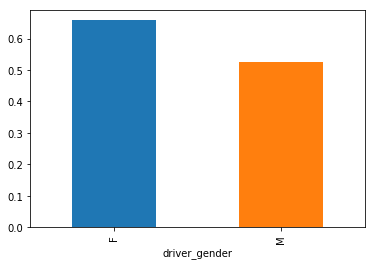

In [67]:
ri.groupby(['driver_gender']).violation.value_counts(normalize=True).unstack().Speeding.plot(kind='bar')


Total number of male driver : 62895  
Total number of female driver : 23511

Total number of male driver having 'Speeding' violation : 32979   
Total number of female driver having 'Speeding' violation : 15482  

percent of female driver having 'Speeding' violation from total number of female driver : 65.850  
percent of male driver having 'Speeding' violation from total number of male driver : 52.435  

**From the above analysis, we can say that female driver often have 'Speeding' violation.**

## Question: 2 Which age group have more violation than others?

In [68]:
## from scratch
list = []

for k in range(1,10):
    ans = ri[(ri.driver_age > (k*10)) & (ri.driver_age <= ((k+1)*10))].shape[0]
    list.append(ans)


<BarContainer object of 9 artists>

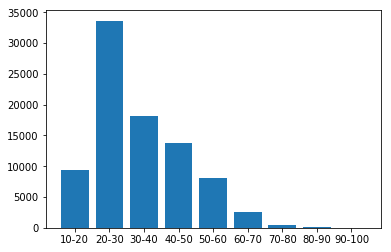

In [69]:
##using matplotlib 
y_pos = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
plt.bar(y_pos,list)

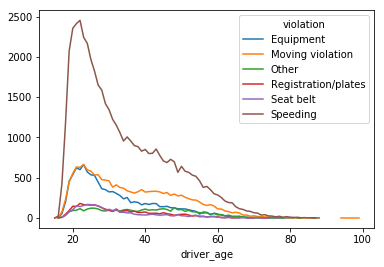

In [70]:
ri.groupby(['driver_age']).violation.value_counts().unstack().plot()


** Observation: Speeding violation is more than other in all age groups.**  
** The Speeding violation occurs most in age group 20-30 years. **

## Question: 3 Freq of search conducted in various races

In [71]:
ri.groupby('driver_race').search_conducted.value_counts(normalize=True).loc[:,True]

driver_race
Asian       0.022576
Black       0.064521
Hispanic    0.061428
Other       0.012500
White       0.028444
Name: search_conducted, dtype: float64

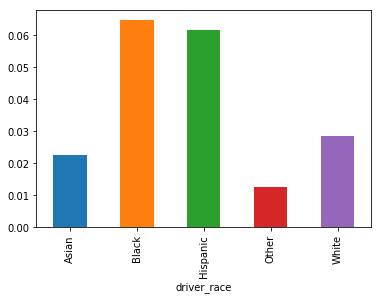

In [72]:
ri.groupby('driver_race').search_conducted.value_counts(normalize=True).loc[:,True].plot(kind='bar')


#### From the above bar graph, we can conclude that Black and Hispanic people have most search conducted than other races.

## Question: 4 Rate of violations during Night


In [73]:
# Combined two columns into one
ri['comb_time'] = ri['stop_date'].map(str)+ ' '+ ri['stop_time']

In [74]:
# convert combined column into date time format
ri.comb_time = pd.to_datetime(ri.comb_time)

In [75]:
# extract night's dataset
ri_night =ri[ (ri.comb_time.dt.time.map(str) > '17:00:00') | (ri.comb_time.dt.time.map(str)  < '05:00:00')]

In [76]:
ri_night.groupby('violation').driver_gender.value_counts(normalize=True).unstack()

driver_gender               F         M
violation                              
Equipment            0.223852  0.776148
Moving violation     0.205801  0.794199
Other                0.213066  0.786934
Registration/plates  0.296073  0.703927
Seat belt            0.220610  0.779390
Speeding             0.266203  0.733797

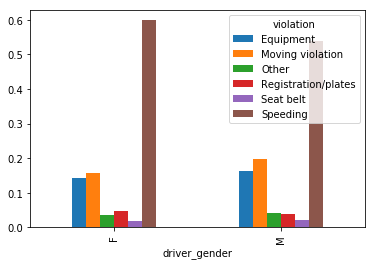

In [77]:
ri_night.groupby('driver_gender').violation.value_counts(normalize=True).unstack().plot(kind='bar')

##### From the above data and bar graph, there are not much more differences between male and female driver having same violations at night.

## Question: 5 Searching those who arrested in various search type

In [78]:
#total count for each search type
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

**Finding the count for those who have arrested according to various search type. **

In [79]:
ri.groupby('search_type').stop_outcome.value_counts().unstack()['Arrest Driver']

search_type
Incident to Arrest                                          575.0
Incident to Arrest,Inventory                                 86.0
Incident to Arrest,Inventory,Probable Cause                  22.0
Incident to Arrest,Inventory,Protective Frisk                 8.0
Incident to Arrest,Inventory,Reasonable Suspicion             3.0
Incident to Arrest,Probable Cause                            50.0
Incident to Arrest,Probable Cause,Protective Frisk            5.0
Incident to Arrest,Probable Cause,Reasonable Suspicion        2.0
Incident to Arrest,Protective Frisk                          18.0
Incident to Arrest,Protective Frisk,Reasonable Suspicion      1.0
Incident to Arrest,Reasonable Suspicion                       5.0
Inventory                                                    45.0
Inventory,Probable Cause                                      9.0
Inventory,Probable Cause,Protective Frisk                     1.0
Inventory,Probable Cause,Reasonable Suspicion                 Na

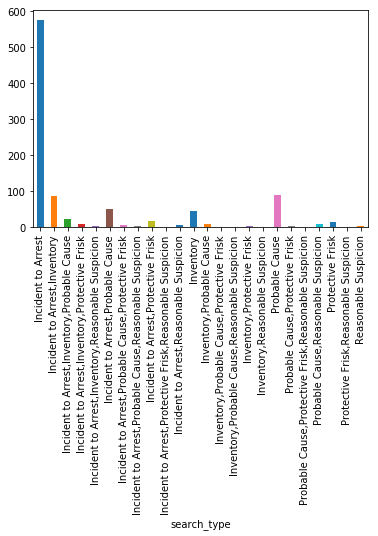

In [80]:
ri.groupby('search_type').stop_outcome.value_counts().unstack()['Arrest Driver'].plot(kind='bar')

## Question: 6 Count those who caught for protective frisk


In [81]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [82]:
ri.frisk.sum()

274

In [83]:
ri_frisk = ri[ri.search_type.str.contains('Protective Frisk') == True]
ri_frisk.driver_gender.value_counts()

M    245
F     29
Name: driver_gender, dtype: int64

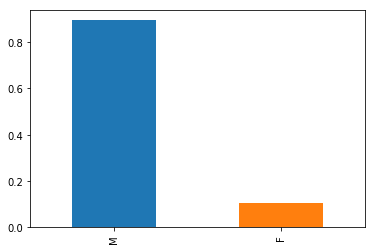

In [84]:
ri_frisk.driver_gender.value_counts(normalize=True).plot(kind = 'bar')

**Concluding that Male Drivers are having more 'Protective Frisk' as search type than Female Driver. **

## Question: 7 Analysis on Drug Related stops


In [85]:
ri.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64